# Linear regression -Multiple variable

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
#do plotting inline instead of in a seperate window.
%matplotlib inline


In [77]:
df = pd.read_csv("C:\\Users\\dhala\\Desktop\\Coursera\\ML-1\\ex1\\ex1data2.txt",header=None,names=['Size','Bedrooms','Price'])
df.shape
df.head(2)


<bound method NDFrame.head of     Size  Bedrooms   Price
0   2104         3  399900
1   1600         3  329900
2   2400         3  369000
3   1416         2  232000
4   3000         4  539900
5   1985         4  299900
6   1534         3  314900
7   1427         3  198999
8   1380         3  212000
9   1494         3  242500
10  1940         4  239999
11  2000         3  347000
12  1890         3  329999
13  4478         5  699900
14  1268         3  259900
15  2300         4  449900
16  1320         2  299900
17  1236         3  199900
18  2609         4  499998
19  3031         4  599000
20  1767         3  252900
21  1888         2  255000
22  1604         3  242900
23  1962         4  259900
24  3890         3  573900
25  1100         3  249900
26  1458         3  464500
27  2526         3  469000
28  2200         3  475000
29  2637         3  299900
30  1839         2  349900
31  1000         1  169900
32  2040         4  314900
33  3137         3  579900
34  1811         4  28590

### Plotting using dataframe built-in library

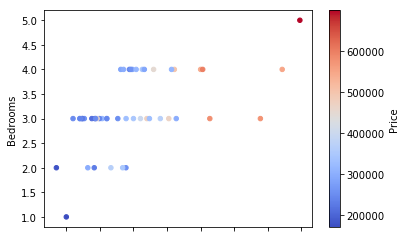

In [41]:
df.plot.scatter(x='Size',y='Bedrooms',c='Price',cmap='coolwarm')

### Plotting using matplotlib

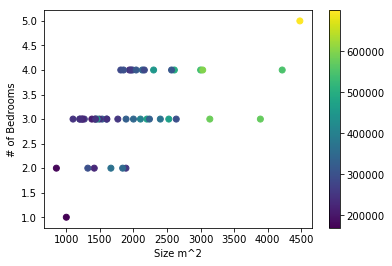

In [42]:
#Pass data to a matrix
x = df.as_matrix(columns = ['Size','Bedrooms'])
y = df.as_matrix(columns = ['Price'])
#plt.tricontour(x[:,0],x[:,1],y[:,0],colors='k')
plt.scatter(df['Size'],df['Bedrooms'],c=y)
plt.xlabel('Size m^2')
plt.ylabel('# of Bedrooms')
plt.colorbar()
plt.show()

In [81]:
df['Name'] = 1
data = {'bias':df['Name'],'Size':df['Size'],'Bedrooms':df['Bedrooms']}
df1 = pd.DataFrame(data)
#df2 = df1[['bias','Size','Bedrooms']]
X = df1.as_matrix(columns = ['bias','Size','Bedrooms'])
y = df.as_matrix(columns = ['Price'])
#print(X.shape)
#print(y.shape)


array([  1.00000000e+00,   2.00068085e+03,   3.17021277e+00])

In [58]:
#print(X)
#print(y)


In [116]:
mu = x.mean(0)
x - mu
standarddeviation = np.sqrt(((x - mu) ** 2).sum(0) / (len(x) - 1))
x_norm = (x - mu) / standarddeviation

df['Name'] = 1
d1 = pd.DataFrame(x_norm)
data = {'Bias':df['Name'],'Size':d1[0],'Bedrooms':d1[1]}
d2 = pd.DataFrame(data)
X = d2.as_matrix(columns = ['Bias','Size','Bedrooms'])
y = df.as_matrix(columns = ['Price'])


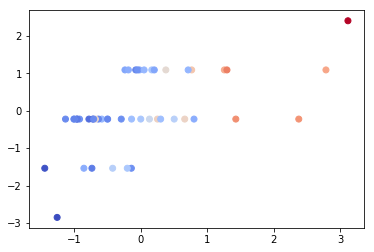

In [115]:
plt.scatter(x=d1[0],y=d1[1],c=y,cmap='coolwarm')

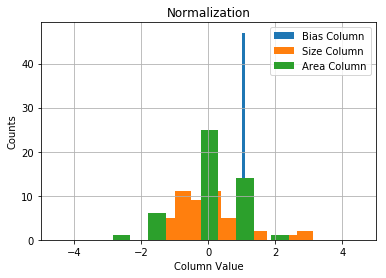

In [118]:
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(X[:,0],label = 'Bias Column')
dummy = plt.hist(X[:,1],label = 'Size Column')
dummy = plt.hist(X[:,2],label = 'Area Column')
plt.title('Normalization')
plt.xlabel('Columns')
plt.ylabel('Counts')
dummy = plt.legend()

In [79]:
datafile = 'C:\\Users\\dhala\\Desktop\\Coursera\\ML-1\\ex1\\ex1data2.txt'
#cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
cols = np.loadtxt(datafile,delimiter=',') #Read in comma separated data
#Form the usual "X" matrix and "y" vector
#X = np.transpose(np.array(cols[:-1]))
#y = np.transpose(np.array(cols[-1:]))
#m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
#X = np.insert(X,0,1,axis=1)
#print(y.shape)
#print(y)


#data = np.loadtxt('ex1data2.txt', delimiter=',')
m = len(cols)
print(m)
xt = np.ones((m, 3))
#print(xt)
xt[:, (1, 2)] = cols[:, (0, 1)]

mu = cols[:, (0, 1)].mean(0)
mu


47


array([ 2000.68085106,     3.17021277])